<a href="https://colab.research.google.com/github/zzhu76/Hemingway-Text-Visualization/blob/main/Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Visualization


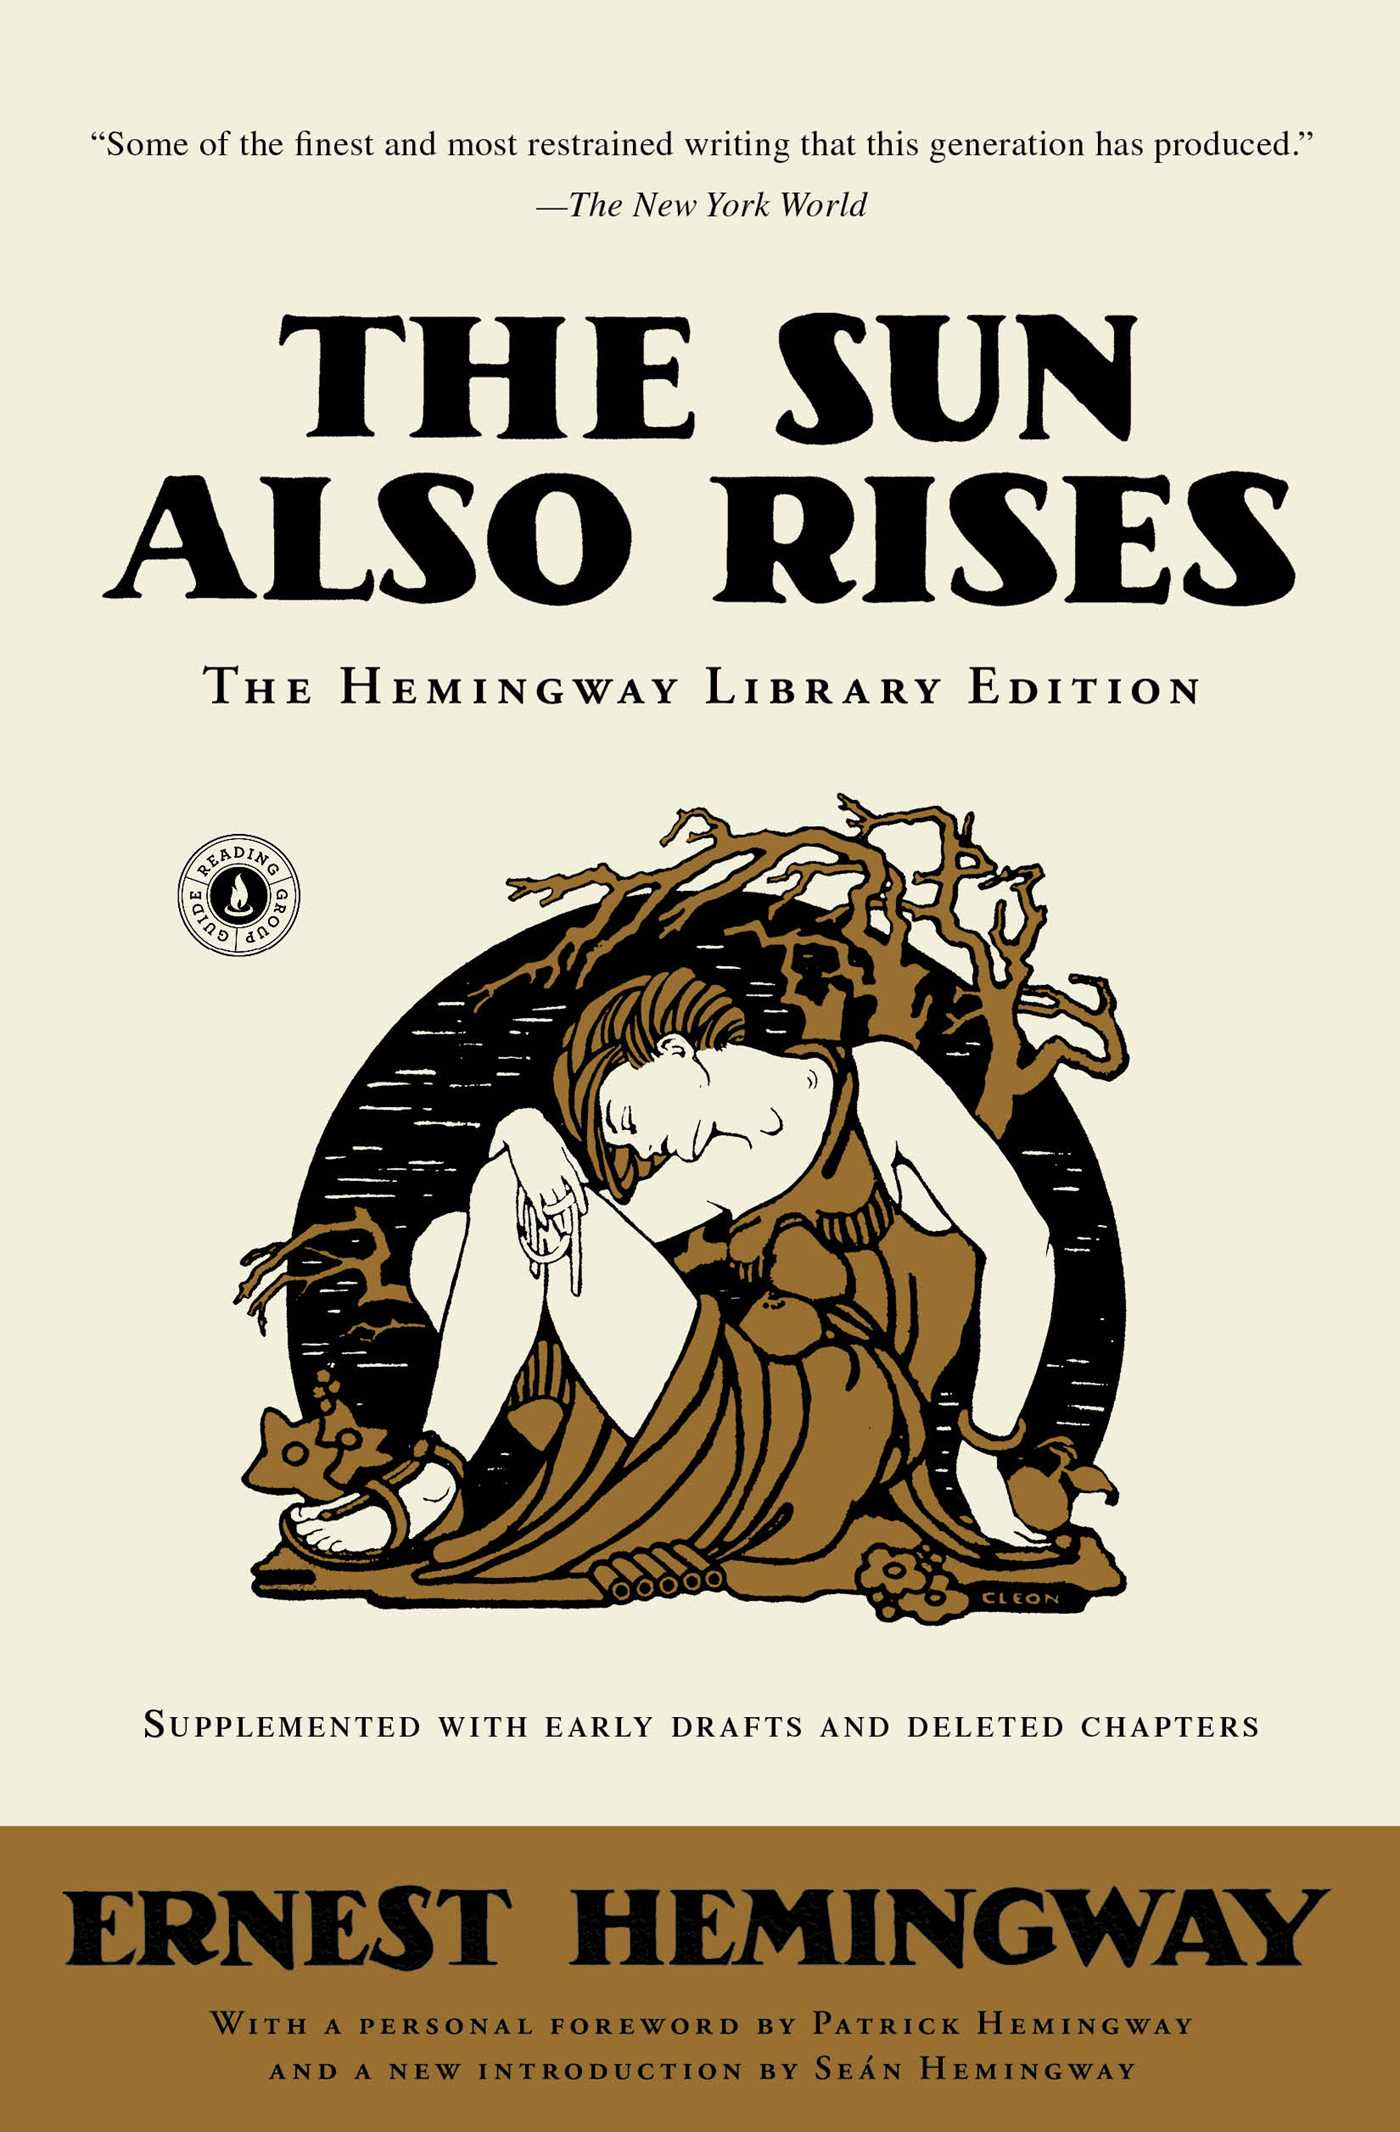

## Ingest

## EDA


## Modeling


## Conclusion
